# Data

1. **Id** - идентификационный номер квартиры
2. **DistrictId** - идентификационный номер района
3. **Rooms** - количество комнат
4. **Square** - площадь
5. **LifeSquare** - жилая площадь
6. **KitchenSquare** - площадь кухни
7. **Floor** - этаж
8. **HouseFloor** - количество этажей в доме
9. **HouseYear** - год постройки дома
10. **Ecology_1**, **Ecology_2**, **Ecology_3** - экологические показатели местности
11. **Social_1**, **Social_2**, **Social_3** - социальные показатели местности
12. **Healthcare_1**, **Helthcare_2** - показатели местности, связанные с охраной здоровья
13. **Shops_1**, **Shops_2** - показатели, связанные с наличием магазинов, торговых центров
14. **Price** - цена квартиры

# Imports

In [46]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score as r2

In [37]:
# Some preliminaries
plt.style.use('ggplot')
plt.rcParams['axes.grid'] = True
%config InlineBackend.figure_format = 'svg'

# First look at the dataset

In [38]:
TRAIN = '~/Python/notebooks/real-estate-price-prediction-moscow/train.csv'
df = pd.read_csv(TRAIN, index_col=0)
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11809 to 7202
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

There are 2 columns with NaNs, namely "LifeSquare" and "Healthcare_1".

In [32]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


1. Notice that max area of apartment is 641 meters², but max floor area is 7480 meters². That is a typo. **Should drop this row**.
2. Also, there are two appartments with area of 32 and 47 meters² and kitchen area of 1970 and 2014 meters² respectively. **Drop this rows either**.
3. HouseYear has two individuals with 20052011 and 4968 values. **Drop them**.

In [33]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

There are 3 str columns, namely "Ecology_1", "Ecology_2" and "Shops_2". **OHE them**.

# Visualization

#### Target variable distribution

Mean: 214139
Median: 192270


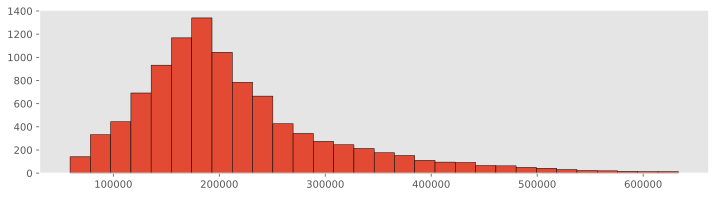

In [4]:
df['Price'].hist(bins=30, ec='k', figsize=(12, 3), grid=False);
print(f"Mean: {round(df['Price'].mean())}\nMedian: {round(df['Price'].median())}")

This distribution is skewed to the right.

#### Numerical features

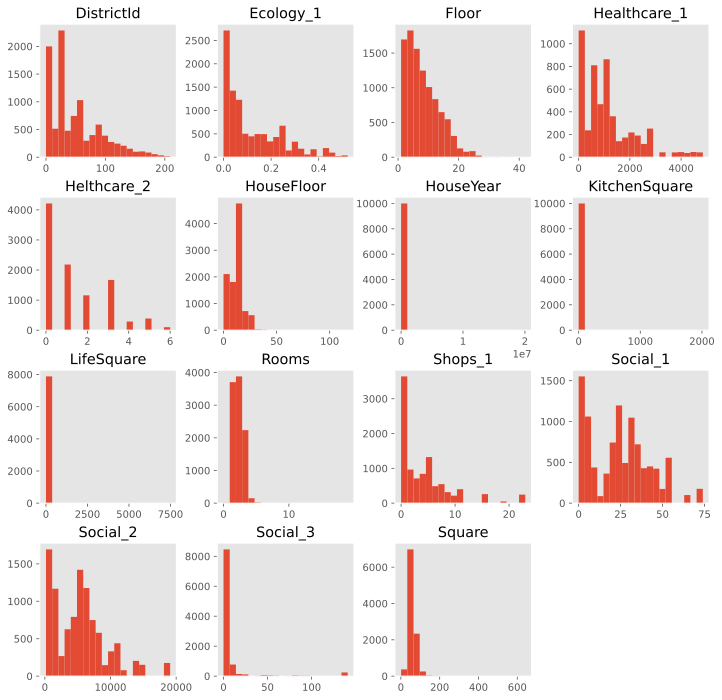

In [5]:
df_num_features = df.select_dtypes(include=[np.number]).copy()
df_num_features.drop(columns='Price', inplace=True)
df_num_features.hist(bins=20, figsize=(12, 12), grid=False);

'LifeSquare', 'Rooms', 'KitchenSquare' and 'HouseYear' look suspicious.

#### Correlation matrix

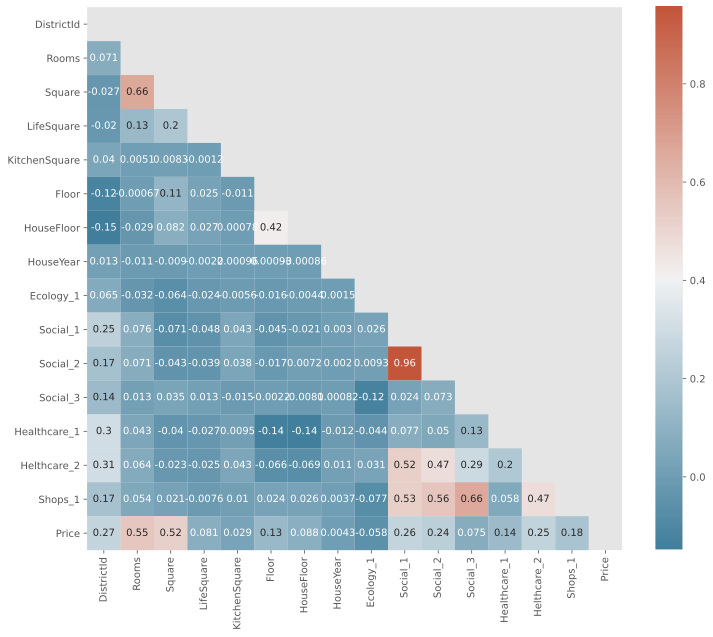

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

'Price' correlates with 'Rooms' and 'Square'.

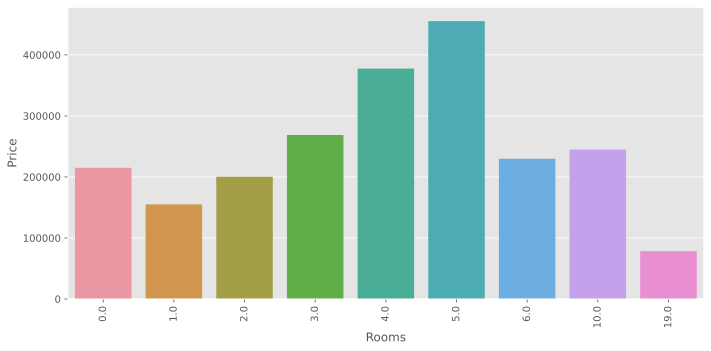

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
y = df.groupby(['Rooms'])['Price'].median()
x = y.index
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.tight_layout();

Apartments with 5 rooms are most expensive.

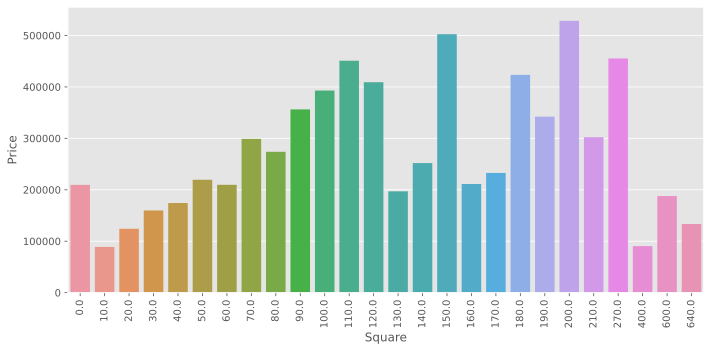

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
square_truncated = df[['Square', 'Price']].copy()
square_truncated['Square'] = square_truncated['Square'] // 10 * 10
y = square_truncated.groupby(['Square'])['Price'].median()
x = y.index
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.tight_layout();

There small expensive apartments and big expensive apartments.

# Filling missing data

In [39]:
medians = df.median()
df = df.fillna(value=medians)

# Abnormal values

In [40]:
# Square, LifeSquare and KitchenSquare
df[df['Square'] < 10] = 10
share_of_living_area = (df['LifeSquare'] / df['Square']).median()
condition_LifeSquare = df['LifeSquare'] > (df['Square'] * .8)
condition_KitchenSquare = (df['KitchenSquare'] * 2) > df['Square']
df.loc[condition_LifeSquare, 'LifeSquare'] = df.loc[condition_LifeSquare, 'Square'] * share_of_living_area
df.loc[condition_KitchenSquare, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] == 1, 'KitchenSquare'] = df['KitchenSquare'].median()
df = df.drop(index=df[df['Square'] > 300].index)

# Year
df = df.drop(index=df[df['HouseYear'] > 2020].index)

# Rooms
df.loc[df['Rooms'] == 0, 'Rooms'] = 1
df.loc[df['Rooms'] > 5, 'Rooms'] = 2

# Floor
med = df['HouseFloor'].median()
cond = df['HouseFloor'] < df['Floor']
df.loc[cond, 'HouseFloor'] = df.loc[cond, 'Floor'].apply(lambda x: x if x > med else med)

# HouseFloor
df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = df['HouseFloor'].median()

# OHE

In [41]:
OHE = pd.get_dummies(df[['Ecology_2', 'Ecology_3', 'Shops_2']])
df = pd.concat(objs=[df, OHE], axis=1)
df = df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'])

# Splitting

In [42]:
Y = df['Price']
DF = df.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(DF, Y, test_size=0.15, random_state=100)

# Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2(y_train, y_pred_train)
r2_test = r2(y_test, y_pred_test)
print(f'Train: {round(r2_train, 5)}\nTest: {round(r2_test, 5)}')

Train: 0.54079
Test: 0.57158


# Random Forest

In [44]:
rf = RandomForestRegressor(30)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

r2_train = r2(y_train, y_pred_train)
r2_test = r2(y_test, y_pred_test)
print(f'Train: {round(r2_train, 5)}\nTest: {round(r2_test, 5)}')

Train: 0.95919
Test: 0.75265


# Gradient Boosting

In [45]:
gb = GradientBoostingRegressor(criterion='mse',
                               max_depth=6,
                               min_samples_leaf=50,
                               random_state=42,  
                               n_estimators=2250, 
                               max_features='sqrt', 
                               loss='huber', 
                               learning_rate=0.025)

gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

r2_train = r2(y_train, y_pred_train)
r2_test = r2(y_test, y_pred_test)
print(f'Train: {round(r2_train, 5)}\nTest: {round(r2_test, 5)}')

Train: 0.85255
Test: 0.79039


# XGBR

In [47]:
xgb = XGBRegressor(max_depth=5,
                   n_estimators=100,
                   min_child_weight=10,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   eta=0.3,
                   seed=42)

xgb.fit(X_train,
        y_train,
        eval_metric="rmse",
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False,
        early_stopping_rounds = 10)

print(f'Test: {round(r2(y_test, xgb.predict(X_test)), 5)}')

Test: 0.78225


# Cross validation

### Linear Regression

In [50]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(lr, DF, Y, cv=kf, scoring='r2', n_jobs=-1)
print(cv_scores, end='\n\n')
print(cv_scores.mean())

[0.54822925 0.58287332 0.53562443 0.46694134 0.56253654 0.53025844
 0.59362442 0.50582045 0.54322981 0.55099553]

0.5420133519755368


### Random Forest

In [52]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(rf, DF, Y, cv=kf, scoring='r2', n_jobs=-1)
print(cv_scores, end='\n\n')
print(cv_scores.mean())

[0.7506244  0.73899732 0.72004521 0.72060708 0.73819474 0.75003872
 0.74654353 0.68279836 0.77584876 0.75411959]

0.7377817702087506


### Gradient Boosting

In [53]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(gb, DF, Y, cv=kf, scoring='r2', n_jobs=-1)
print(cv_scores, end='\n\n')
print(cv_scores.mean())

[0.77107961 0.75125483 0.75486854 0.74750016 0.77281004 0.76595825
 0.77773934 0.7367396  0.80615265 0.76643708]

0.7650540100933265


# Submition to kaggle

In [55]:
TEST = '~/Python/notebooks/real-estate-price-prediction-moscow/test.csv'
SUBMIT = '~/Python/notebooks/real-estate-price-prediction-moscow/sample_submission.csv'
test_df = pd.read_csv(TEST)
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [57]:
medians = test_df.median()
test_df = test_df.fillna(value=medians)

In [60]:
# Square, LifeSquare and KitchenSquare
test_df[test_df['Square'] < 10] = 10
share_of_living_area = (test_df['LifeSquare'] / test_df['Square']).median()
condition_LifeSquare = test_df['LifeSquare'] > (test_df['Square'] * .8)
condition_KitchenSquare = (test_df['KitchenSquare'] * 2) > test_df['Square']
test_df.loc[condition_LifeSquare, 'LifeSquare'] = test_df.loc[condition_LifeSquare, 'Square'] * share_of_living_area
test_df.loc[condition_KitchenSquare, 'KitchenSquare'] = test_df['KitchenSquare'].median()
test_df.loc[test_df['KitchenSquare'] == 1, 'KitchenSquare'] = test_df['KitchenSquare'].median()
test_df[test_df['Square'] > 300] = test_df['Square'].median()

# Year
test_df[test_df['HouseYear'] > 2020] = test_df['HouseYear'].median()

# Rooms
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = 1
test_df.loc[test_df['Rooms'] > 5, 'Rooms'] = 2

# Floor
med = test_df['HouseFloor'].median()
cond = test_df['HouseFloor'] < test_df['Floor']
test_df.loc[cond, 'HouseFloor'] = test_df.loc[cond, 'Floor'].apply(lambda x: x if x > med else med)

# HouseFloor
test_df.loc[test_df['HouseFloor'] > 50, 'HouseFloor'] = test_df['HouseFloor'].median()

In [61]:
OHE = pd.get_dummies(test_df[['Ecology_2', 'Ecology_3', 'Shops_2']])
test_df = pd.concat(objs=[test_df, OHE], axis=1)
test_df = test_df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'])